# TMDB(영화) 데이터셋 사용한 데이터 분석

In [17]:
'''
TMDB(영화) 데이터셋으로 학습 진행해보기
피처(속성)으로는 ID, 제목, 평균 투표수, 투표수, 상태, 개봉일, 수익, 상영시간, 국가 등등이 포함되어있음
이것을 이용해서 실습
'''
import numpy as np
import pandas as pd
import matplotlib as plt

# 영화 데이터셋 불러오기
df = pd.read_csv("TMDB_movie_dataset_v11.csv")


print(df.head(10))

       id                    title  vote_average  vote_count    status  \
0   27205                Inception         8.364       34495  Released   
1  157336             Interstellar         8.417       32571  Released   
2     155          The Dark Knight         8.512       30619  Released   
3   19995                   Avatar         7.573       29815  Released   
4   24428             The Avengers         7.710       29166  Released   
5  293660                 Deadpool         7.606       28894  Released   
6  299536   Avengers: Infinity War         8.255       27713  Released   
7     550               Fight Club         8.438       27238  Released   
8  118340  Guardians of the Galaxy         7.906       26638  Released   
9     680             Pulp Fiction         8.488       25893  Released   

  release_date     revenue  runtime  adult                     backdrop_path  \
0   2010-07-15   825532764      148  False  /8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg   
1   2014-11-05   70172920

In [18]:
'''
이 영화 데이터셋으로 할 수 있다고 생각하는 것은 크게 2가지
1. 시대별로 어떤 장르의 영화가 유행했는지 또는 쇠퇴했는지 흥망을 알수있고, 
이러한 흐름을 파악하면 사람들의 기호를 파악할 수 있을것이라 생각한다.
그렇다면 앞으로의 수익성이 있을만한 장르를 예상 할 수 있을것이라 생각한다.

2. 이 데이터 셋에는 다양한 장르와 배우가 연기한 영화들이 많이 담겨있다.
어떤 사람은 액션 영화를 좋아할 것이고, 로맨스를 좋아하는 사람도 있다.
사람들의 선호도에 맞추어 다양한 영화를 추천해줄 수 있을것이라 생각한다.

이 프로젝트에서는 1번을 선택하여 각각의 시대별로 장르와 평점을 주로하여 
수익성과 평점이 높은 장르는 무엇인지 영화는 무엇인지를 파악하여
시대의 경향을 파악하고 미래의 어떤것이 유행하고 수익성이 있을지 예상해 볼 것이다.
'''

'\n이 영화 데이터셋으로 할 수 있다고 생각하는 것은 크게 2가지\n1. 시대별로 어떤 장르의 영화가 유행했는지 또는 쇠퇴했는지 흥망을 알수있고, \n이러한 흐름을 파악하면 사람들의 기호를 파악할 수 있을것이라 생각한다.\n그렇다면 앞으로의 수익성이 있을만한 장르를 예상 할 수 있을것이라 생각한다.\n\n2. 이 데이터 셋에는 다양한 장르와 배우가 연기한 영화들이 많이 담겨있다.\n어떤 사람은 액션 영화를 좋아할 것이고, 로맨스를 좋아하는 사람도 있다.\n사람들의 선호도에 맞추어 다양한 영화를 추천해줄 수 있을것이라 생각한다.\n\n이 프로젝트에서는 1번을 선택하여 각각의 시대별로 장르와 평점을 주로하여 \n수익성과 평점이 높은 장르는 무엇인지 영화는 무엇인지를 파악하여\n시대의 경향을 파악하고 미래의 어떤것이 유행하고 수익성이 있을지 예상해 볼 것이다.\n'

### Step 1. 연도 컬럼 만들기.

In [19]:
'''
시대별 영화 10년 기준으로 분류하기
release_date -> release_year, decade 추출
 -> 원래 데이터에는 release_date(날짜)는 있지만 연도는 없기때문에 연도와 시대를 따로 분류해야함
 -> 이것이 바로 데이터를 활용하기 위한 전처리 과정
 -> ex) 1994-07-06 -> 1994
''' 


# release_date를 날짜형식으로 바꾸기(문자열 -> 날짜)
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

# 날짜에서 연도만 추출하여 새 컬럼 만들기
df['release_year'] = df['release_date'].dt.year

# 확인
df[['title', 'release_date', 'release_year']].head()


,title,release_date,release_year
0,Inception,2010-07-15,2010.0
1,Interstellar,2014-11-05,2014.0
2,The Dark Knight,2008-07-16,2008.0
3,Avatar,2009-12-15,2009.0
4,The Avengers,2012-04-25,2012.0


### Step 2. 10년 단위로 시대 분류하기(decade)

In [20]:
'''
연도는 숫자로 되어있기 때문에 1990s, 2000s 처럼 문자형태로 그룹화 해야 활용하기 쉬움
이렇게 시대별로 분류한다면 특징을 알기 쉬움
'''

# 1994 -> 1990s, 2002 -> 2000s 처럼 변환
df['decade'] = (df['release_year'] // 10 * 10).astype('Int64').astype(str) + 's'
print(df['decade'])

# // 10 * 10 을 하는 이유 -> 1994를 1990으로 바꾸는 과정

'''
중간 요약
release_date -> 개봉일
release_year -> 연도
decade -> 10년단위 시대 구분
'''

0          2010s
1          2010s
2          2000s
3          2000s
4          2010s
           ...  
1266860    2010s
1266861    2010s
1266862    2010s
1266863    2020s
1266864    2020s
Name: decade, Length: 1266865, dtype: object


'\n중간 요약\nrelease_date -> 개봉일\nrelease_year -> 연도\ndecade -> 10년단위 시대 구분\n'

### Step 3: 장르 데이터 분리

In [21]:
'''
하나의 영화는 여러 장르를 가질 수 있음
ex) 인셉션 -> (액션, 모험, SF) 

이 상태에서는 장르를 이용하기 어렵기 때문에 분리하는 과정이 필요함
ex )
인셉션 : 액션
인셉션 : 모험
타이타닉 : 드라마
타이타닉 : 로맨스
이렇게 나눈다면 groupby를 사용하여 집계를 할 수 있음
'''

# 장르 컬럼을 문자열 -> 리스트로 변환
# ['Action', 'Science Fiction', 'Adventure'] 쉼표로 구분된 문자열을 split(',') 방식으로 변경
# fillna('') 결측치를 빈 문자열로 바꿈
# 현재는 필요없는 과정, 필요하다면 진행


'''
3-1
Drama라는 장르의 정제를 위해 되돌아옴
Drama라는 장르가 단독으로 있을경우는 카운팅하고
여러장르가 혼합되어 있을경우에는 체크 해제
'''
def clean_drama_doc(genres):
    if not isinstance(genres, list):
        return genres
    if genres == ['Drama'] or genres == ['Documentary']:
        return genres # 드라마만 단독인경우 유지
    return [g for g in genres if g not in ['Drama', 'Documentary']] # 그렇지 않으면 드라마, 다큐 제거
    
df['genres'] = df['genres'].apply(clean_drama_doc)
df['genres']
df['genres'] = df['genres'].fillna('').apply(lambda x: [genre.strip() for genre in x.split(',')] if x else [])
print(df['genres'])

# explode를 이용해 장르를 개별 행으로 분해
df_exploded = df.explode('genres')

# 개별 행 분해 이후 다시 연도와 decade 생성
df_exploded = df_exploded[df_exploded['release_year'].notnull()]

# 1950 ~ 2025까지 범위 생성
df_exploded = df_exploded[
    (df_exploded['release_year'] >= 1950) & (df_exploded['release_year'] <= 2025)
]
df_exploded['decade'] = (df_exploded['release_year'] // 10 * 10).astype('Int64').astype(str) + 's'


df_exploded[['title', 'genres', 'release_year', 'decade']].head(700)

0                   [Action, Science Fiction, Adventure]
1                    [Adventure, Drama, Science Fiction]
2                       [Drama, Action, Crime, Thriller]
3          [Action, Adventure, Fantasy, Science Fiction]
4                   [Science Fiction, Action, Adventure]
                               ...                      
1266860                                         [Comedy]
1266861                                    [Documentary]
1266862                                    [Documentary]
1266863                         [Documentary, Animation]
1266864                           [Crime, Comedy, Drama]
Name: genres, Length: 1266865, dtype: object


,title,genres,release_year,decade
0,Inception,Action,2010.0,2010s
0,Inception,Science Fiction,2010.0,2010s
0,Inception,Adventure,2010.0,2010s
1,Interstellar,Adventure,2014.0,2010s
1,Interstellar,Drama,2014.0,2010s
...,...,...,...,...
238,The Conjuring,Thriller,2013.0,2010s
239,The Fault in Our Stars,Romance,2014.0,2010s
239,The Fault in Our Stars,Drama,2014.0,2010s
240,The Notebook,Romance,2004.0,2000s


### Step 4: 시대별 장르 등장 횟수

In [22]:
'''
우리는 시대별 장르의 트렌드를 알아야 하기 때문에 시대마다 어떤 장르가 많이 등장했는지 알아야 함.
그래서 시대 + 장르를 조합하여 영화의 수를 세는 작업이 필요함

groupby -> 그룹별 집계
.size -> 각 그룹 카운트
.reset_index -> 결과를 표로하여 보기 쉽게
'''
# 데이터 셋에는 미래연도인 2030~2090까지와 결측치인 NA가 존재하기 때문에 범위 제한이 필요함

# 분석에 포함할 유효 decade 지정
valid_decades = ['1960s', '1970s', '1980s', '1990s', '2000s', '2010s', '2020s']

# 필터 적용

filtered_df = df_exploded[df_exploded['decade'].isin(valid_decades)]

# 시대별, 장르별 영화 수 세기

genre_by_decade = filtered_df.groupby(['decade', 'genres']).size().reset_index(name='count')
genre_by_decade.sort_values(['decade', 'count'], ascending = [False, False]).head(10)

,decade,genres,count
120,2020s,Drama,50431
119,2020s,Documentary,46531
117,2020s,Comedy,27830
124,2020s,Horror,16567
130,2020s,Thriller,13381
116,2020s,Animation,13251
127,2020s,Romance,10767
125,2020s,Music,10347
114,2020s,Action,8625
118,2020s,Crime,6298


### 히트맵 시각화

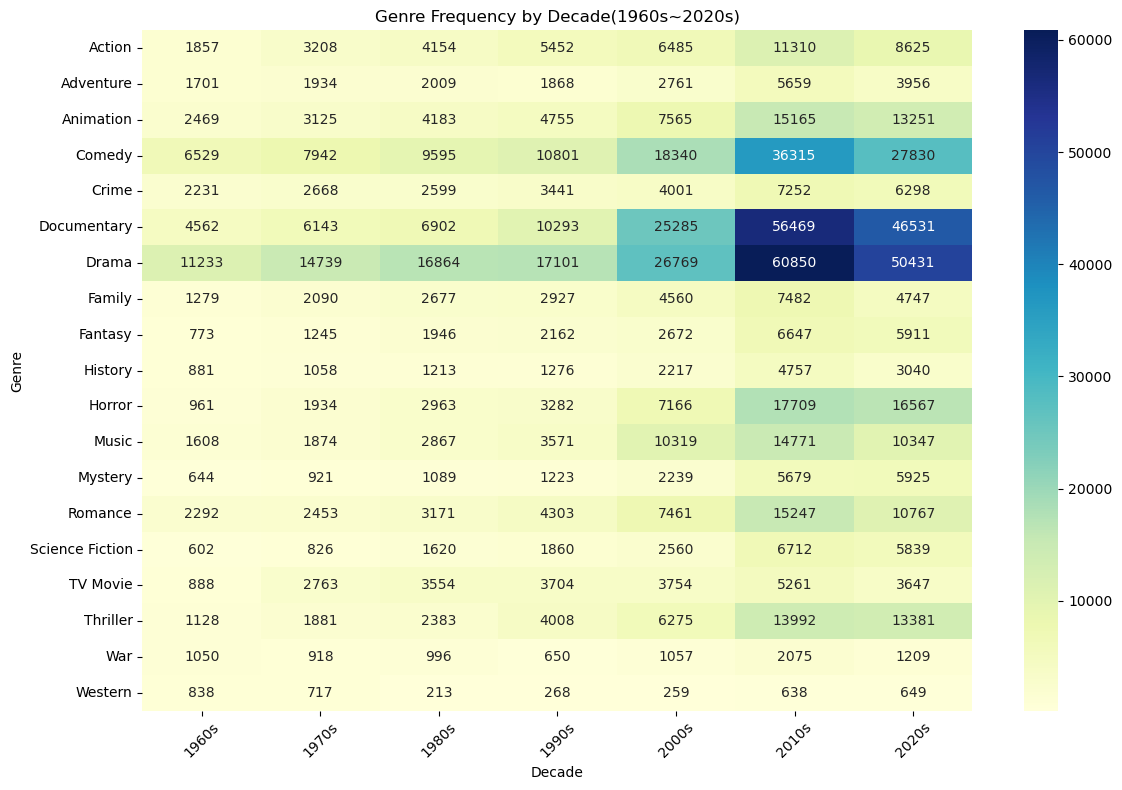

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# 피벗(기준) 테이블로 히트맵용 데이터 만들기
genre_pivot = genre_by_decade.pivot(index = 'genres', columns = 'decade', values = 'count').fillna(0)

# 효율비교를 위한 변수 생성(1)
genre_pivot_all = genre_pivot


# 히트맵 그리기
plt.figure(figsize=(12, 8))
sns.heatmap(genre_pivot, annot=True, fmt=".0f", cmap="YlGnBu")

plt.title("Genre Frequency by Decade(1960s~2020s)")
plt.xlabel("Decade")
plt.ylabel("Genre")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


# 다른 장르와 결합된 다큐, 드라마는 제거하고 단독장르만 남긴 히트맵

In [24]:
'''
시대 및 장르별 영화 트렌드 분석결과
60년대부터 드라마 장르에서 많은 제작이 이루어지고 있고 그 다음으로 다큐멘터리, 코메디, 공포가 강세를 보이고 있다.
역사, 웨스턴, 모험 영화는 적은 제작수를 나타내고 있다.
2000년대부터 스트리밍의 발달로 다큐멘터리, 애니메이션이 성장했고, 2010년 부터는 코미디, 드라마, 다큐중심으로 이루어져있다.

개인적인 의견으로 '드라마'와 '다큐' 라는 장르는 너무 광범위해서 이 데이터를 활용하려면 좀더 정제가 
필요하다고 생각한다.
'''

"\n시대 및 장르별 영화 트렌드 분석결과\n60년대부터 드라마 장르에서 많은 제작이 이루어지고 있고 그 다음으로 다큐멘터리, 코메디, 공포가 강세를 보이고 있다.\n역사, 웨스턴, 모험 영화는 적은 제작수를 나타내고 있다.\n2000년대부터 스트리밍의 발달로 다큐멘터리, 애니메이션이 성장했고, 2010년 부터는 코미디, 드라마, 다큐중심으로 이루어져있다.\n\n개인적인 의견으로 '드라마'와 '다큐' 라는 장르는 너무 광범위해서 이 데이터를 활용하려면 좀더 정제가 \n필요하다고 생각한다.\n"

## 1. 80년대 이상 평점 기준 필터링

In [25]:
'''
지금까지는 데이터셋의 모든 영화를 카운팅함.
하지만 너무 과거의 영화는 유효하지 않다고 판단하고 제거하고 
평점의 기준을 7점으로 잡고 그 이상의 영화만 먼저 필터링하여 
평점이 너무 낮은 영화들은 수익성이 낮다고 판단하여 제거하는 과정을 거치도록 함
'''

'\n지금까지는 데이터셋의 모든 영화를 카운팅함.\n하지만 너무 과거의 영화는 유효하지 않다고 판단하고 제거하고 \n평점의 기준을 7점으로 잡고 그 이상의 영화만 먼저 필터링하여 \n평점이 너무 낮은 영화들은 수익성이 낮다고 판단하여 제거하는 과정을 거치도록 함\n'

### Step 1: 유효한 연도와 평점 기준 필터링 추가

In [26]:
# 1980년대 이후 범위 지정
new_valid_decades = ['1980s', '1990s', '2000s', '2010s', '2020s']

#평점 7점 이상 조건으로 필터링

filtered_df = df_exploded[
    (df_exploded['decade'].isin(new_valid_decades)) &
    (df_exploded['vote_average'] >= 7.0)
]

### Step 2: 필터링 후 장르별/시대별 영화 수 세기

In [27]:
genre_by_decade = (
    filtered_df
    .groupby(['decade', 'genres']) # 시대와 장르별로 그룹화
    .size() # 각 그룹의 개수 카운팅
    .reset_index(name='count') # 결과를 DataFrame으로 바꾸고 카운팅
    .sort_values(['decade', 'count'], ascending=[False, False]) 
    # decade 내림차순, count 내림차순으로 정렬
)
print(genre_by_decade)

   decade       genres  count
82  2020s        Drama   6616
81  2020s  Documentary   6036
79  2020s       Comedy   4048
92  2020s     Thriller   2000
86  2020s       Horror   1837
..    ...          ...    ...
9   1980s      History    211
17  1980s          War    174
10  1980s       Horror    172
12  1980s      Mystery    172
18  1980s      Western     26

[95 rows x 3 columns]


### Step 3: 히트맵을 위한 피벗 테이블 생성

In [28]:
# 피벗 테이블 생성
# -> 행 : 장르, 열 : 시대(10년단위), 값 : count

genre_pivot = (
    genre_by_decade
    .pivot(index = 'genres', columns = 'decade', values = 'count')
    .fillna(0)
)
genre_pivot_filtered = genre_pivot
print(genre_pivot)

decade           1980s  1990s  2000s  2010s  2020s
genres                                            
Action             507    676    843   2068   1456
Adventure          399    324    507   1310    796
Animation          625    625   1288   2726   1392
Comedy            1326   1367   2359   5784   4048
Crime              365    419    497   1155    978
Documentary        682   1204   3947  10500   6036
Drama             2151   2197   3469   9471   6616
Family             485    437    793   1646    843
Fantasy            296    300    392   1234   1004
History            211    218    445   1219    759
Horror             172    207    406   1567   1837
Music              524    774   2365   3706   1815
Mystery            172    184    282    865   1028
Romance            453    505    785   2351   1642
Science Fiction    219    204    321   1031    885
TV Movie           521    484    555    985    846
Thriller           243    372    510   1678   2000
War                174    114  

### Step 4: 히트맵 시각화

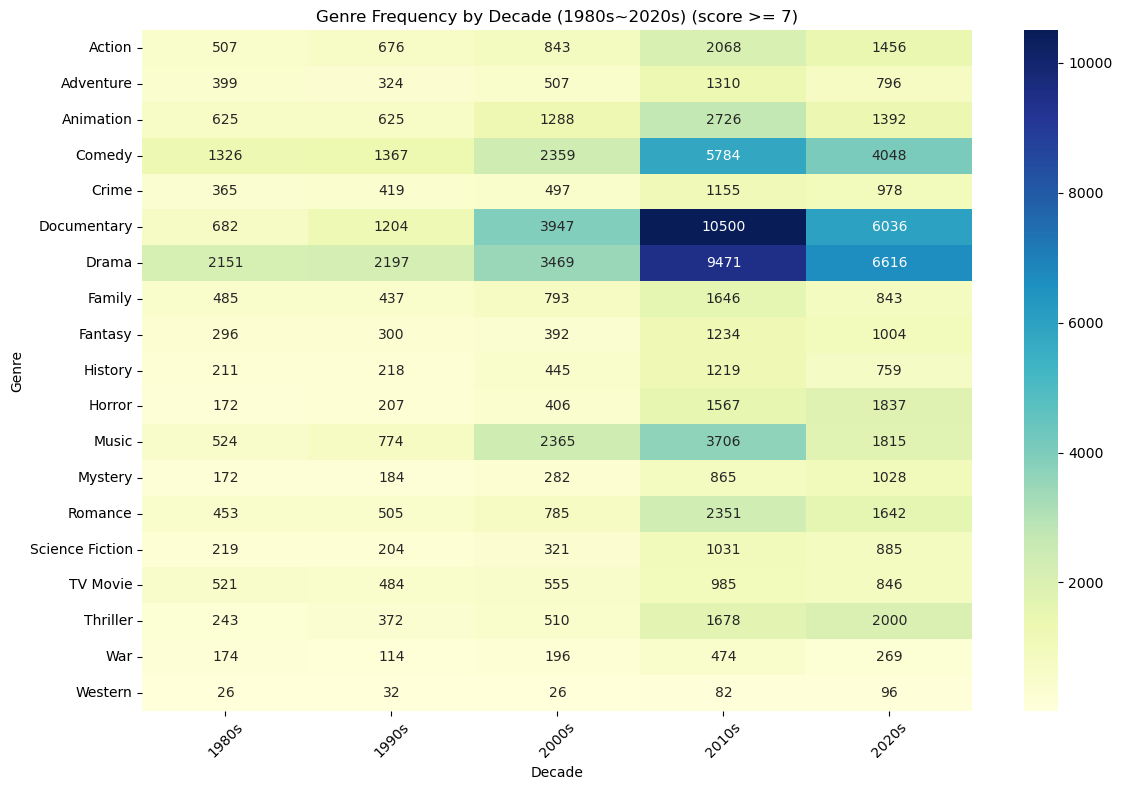

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# 히트맵 크기 설정
plt.figure(figsize=(12, 8)) # 가로 12인치 세로8인치

# 히트맵 그리기
sns.heatmap(
    genre_pivot, # 피벗테이블 시각화
    annot = True, #셀 안에 숫자 보여줌
    fmt = ".0f", # 정수형으로 표시
    cmap="YlGnBu" # 색상은 노랑초록파랑 계열
)

# 히트맵에 제목 및 축 레이블 추가
plt.title("Genre Frequency by Decade (1980s~2020s) (score >= 7)")
plt.xlabel("Decade")
plt.ylabel("Genre")

# x축, y축 회전 조정
plt.xticks(rotation=45)
plt.yticks(rotation=0)

#레이아웃 자동조정
plt.tight_layout()

plt.show()

### 장르, 시대별 영화갯수 비율 평점 7점이상 효율

In [30]:
# 장르,시대별 전체 영화 수 대비 평점 6점대 이상 영화를 구함
# 이 것을 안다면 장르별 효율을 구할 수 있을것이라 생각함
decade_range = ['1980s', '1990s', '2000s', '2010s', '2020s']
genre_ratio = genre_pivot_filtered[decade_range] / genre_pivot_all[decade_range]
genre_ratio_filtered = genre_ratio[decade_range]

# 결측값 계산
genre_ratio = genre_ratio.fillna(0)

# 0.12로 나올것들을 12%로 포맷팅
genre_ratio_percent = genre_ratio.apply(lambda col: col.map(lambda x: f"{x * 100:.1f}%"))
print(genre_ratio_percent)

decade           1980s  1990s  2000s  2010s  2020s
genres                                            
Action           12.2%  12.4%  13.0%  18.3%  16.9%
Adventure        19.9%  17.3%  18.4%  23.1%  20.1%
Animation        14.9%  13.1%  17.0%  18.0%  10.5%
Comedy           13.8%  12.7%  12.9%  15.9%  14.5%
Crime            14.0%  12.2%  12.4%  15.9%  15.5%
Documentary       9.9%  11.7%  15.6%  18.6%  13.0%
Drama            12.8%  12.8%  13.0%  15.6%  13.1%
Family           18.1%  14.9%  17.4%  22.0%  17.8%
Fantasy          15.2%  13.9%  14.7%  18.6%  17.0%
History          17.4%  17.1%  20.1%  25.6%  25.0%
Horror            5.8%   6.3%   5.7%   8.8%  11.1%
Music            18.3%  21.7%  22.9%  25.1%  17.5%
Mystery          15.8%  15.0%  12.6%  15.2%  17.4%
Romance          14.3%  11.7%  10.5%  15.4%  15.3%
Science Fiction  13.5%  11.0%  12.5%  15.4%  15.2%
TV Movie         14.7%  13.1%  14.8%  18.7%  23.2%
Thriller         10.2%   9.3%   8.1%  12.0%  14.9%
War              17.5%  17.5%  

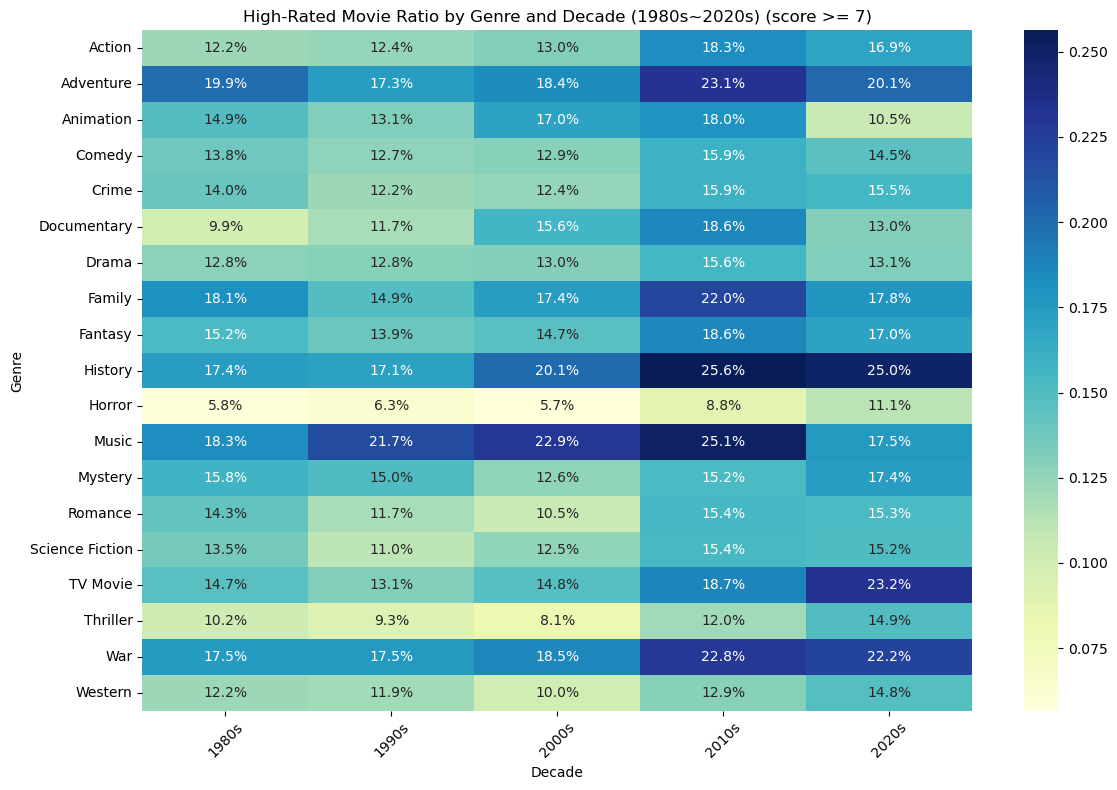

In [31]:
# 히트맵 시각화

plt.figure(figsize=(12, 8))
sns.heatmap(
    genre_ratio,  # 실제 수치
    annot=genre_ratio_percent,  # 퍼센트 표시된 문자열
    fmt="",  # 문자열 그대로 출력
    cmap="YlGnBu"
)

plt.title("High-Rated Movie Ratio by Genre and Decade (1980s~2020s) (score >= 7)")
plt.xlabel("Decade")
plt.ylabel("Genre")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### 평점 8.0 이상 필터링

In [71]:
# 고득점 영화
high_df = df_exploded[
    (df_exploded['decade'].isin(decade_range)) & 
    (df_exploded['vote_average'] >= 8.0) 
]
# print(high_df.head(50))

# 고득점 영화의 수
high_count = (
    high_df
    .groupby(['decade', 'genres'])
    .size()
    .reset_index(name='count')
)

# 테이블 구성
high_pivot = high_count.pivot(index='genres', columns='decade', values='count').fillna(0)
# print(high_pivot)

decade              1980s     1990s     2000s     2010s     2020s
genres                                                           
Action           0.044295  0.059795  0.049036  0.086118  0.107246
Adventure        0.083126  0.074946  0.076784  0.109737  0.128665
Animation        0.053311  0.050263  0.077594  0.080053  0.063241
Comedy           0.054612  0.047125  0.051636  0.074597  0.095005
Crime            0.045787  0.043301  0.035241  0.059570  0.098126
Documentary      0.053608  0.062567  0.080166  0.101790  0.089317
Drama            0.047972  0.045553  0.041578  0.068858  0.081914
Family           0.079567  0.067988  0.083114  0.097968  0.103223
Fantasy          0.048818  0.060592  0.061003  0.087257  0.112671
History          0.075845  0.081505  0.082093  0.117511  0.158882
Horror           0.024975  0.027118  0.029026  0.047546  0.081849
Music            0.111615  0.145898  0.152340  0.173854  0.139364
Mystery          0.051423  0.049877  0.048236  0.074837  0.126751
Romance   

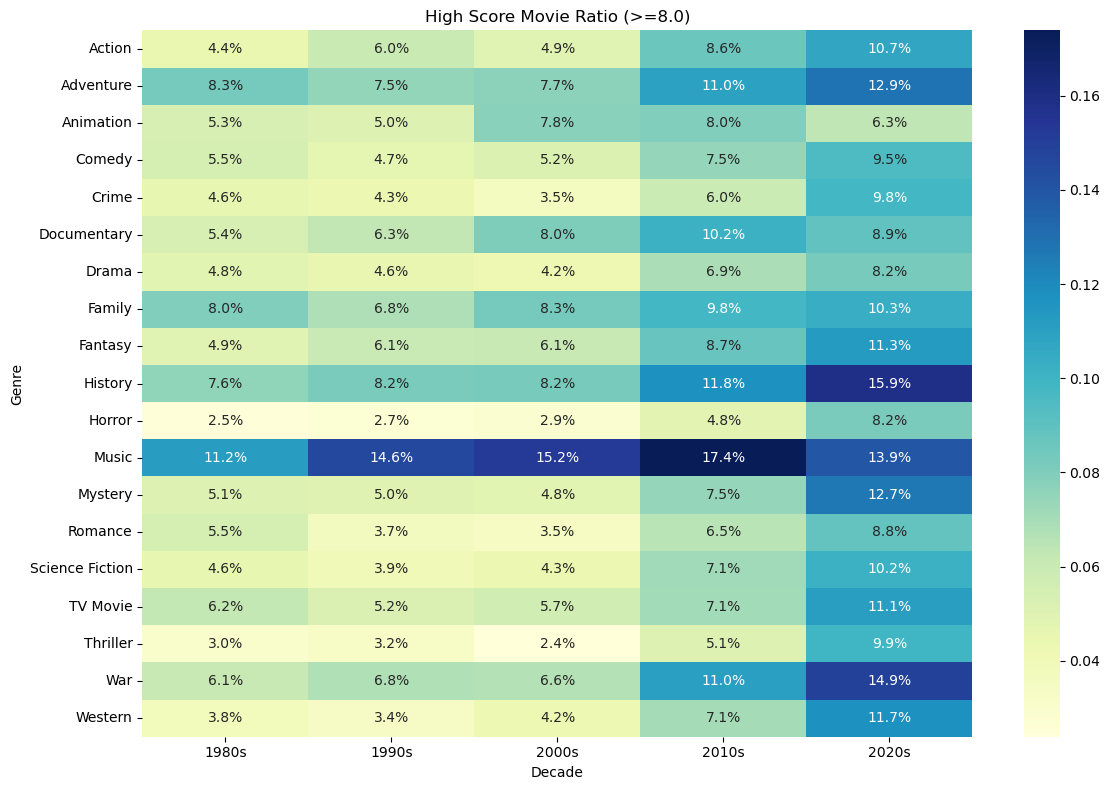

In [39]:
# 전체 장르별 영화 수 대비 8.0점 이상 영화 비율
ratio_high = high_pivot[decade_range] / genre_pivot_all[decade_range]
print(ratio_high)

ratio_high_percent = ratio_high.map(lambda x: f"{x * 100:.1f}%")

plt.figure(figsize=(12, 8))
sns.heatmap(
    ratio_high,  # 실수 데이터
    annot=ratio_high_percent,  # 퍼센트 표시
    fmt="",
    cmap="YlGnBu"
)
plt.title("High Score Movie Ratio (>=8.0)")
plt.xlabel("Decade")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()

In [40]:
# 7점 ~ 8점 사이의 영화
# 중간점수대의 영화
mid_df = df_exploded[
    (df_exploded['decade'].isin(decade_range)) & 
    (df_exploded['vote_average'] >= 7.0) &
    (df_exploded['vote_average'] < 8.0)
]

# 중간점수대의 영화의 수
mid_count = (
    mid_df
    .groupby(['decade', 'genres'])
    .size()
    .reset_index(name='count')
)

# 테이블 구성
mid_pivot = mid_count.pivot(index='genres', columns='decade', values='count').fillna(0)
print(mid_pivot)

decade           1980s  1990s  2000s  2010s  2020s
genres                                            
Action             323    350    525   1094    531
Adventure          232    184    295    689    287
Animation          402    386    701   1512    554
Comedy             802    858   1412   3075   1404
Crime              246    270    356    723    360
Documentary        312    560   1920   4752   1880
Drama             1342   1418   2356   5281   2485
Family             272    238    414    913    353
Fantasy            201    169    229    654    338
History            119    114    263    660    276
Horror              98    118    198    725    481
Music              204    253    793   1138    373
Mystery            116    123    174    440    277
Romance            280    347    527   1357    696
Science Fiction    145    131    210    552    292
TV Movie           300    290    342    611    441
Thriller           171    243    360    959    676
War                113     70  

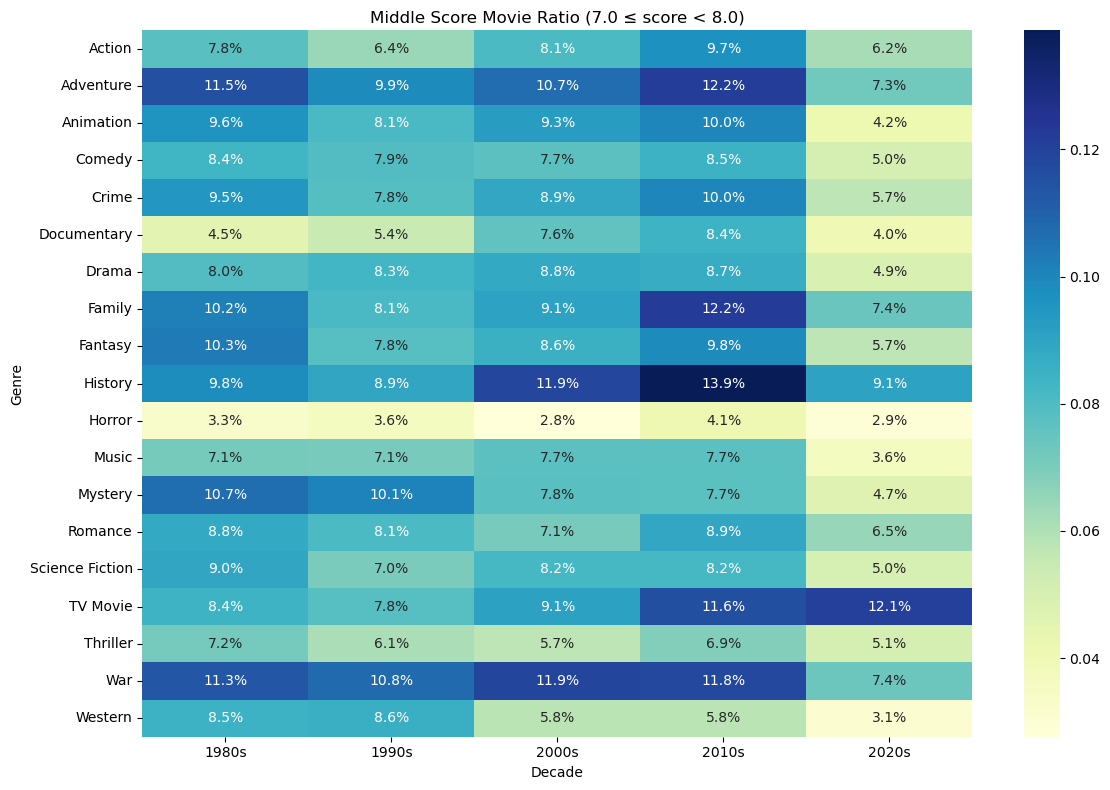

In [41]:
# 전체 장르별 영화 수 대비 7점 이상 8점 이하 영화 비율
ratio_mid = mid_pivot[decade_range] / genre_pivot_all[decade_range]

ratio_mid_percent = ratio_mid.map(lambda x: f"{x * 100:.1f}%")

plt.figure(figsize=(12, 8))
sns.heatmap(
    ratio_mid,  # 실수 데이터
    annot=ratio_mid_percent,  # 퍼센트 표시
    fmt="",
    cmap="YlGnBu"
)
plt.title("Middle Score Movie Ratio (7.0 ≤ score < 8.0)")
plt.xlabel("Decade")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()

In [42]:
'''
현재까지 중간 요약

첫번째 히트맵
 -> 60년대부터 2020년대까지 영화를 장르별로 나누어 카운트
 -> 하나의 영화에 여러 장르가 있을경우 각각 장르를 나누어 카운트함

 -> 00년대 이후 코미디, 다큐멘터리, 드라마, 애니메이션 장르의 영화가 대폭 늘어남
 -> 하지만 드라마와 다큐멘터리는 장르가 굉장히 넓기 때문에 감안 해야함
 -> 따라서 코미디, 애니메이션, 호러, 뮤직, 로맨스, 스릴러, 액션과 같은 장르는 많은수의 영화가 생겨났다고 판단해도 무방함

 -> 역사, 웨스턴, TVMOVIE, 어드벤쳐 장르의 영화는 수가 많지않은 영화

두번째 히트맵
  -> 장르별로 나눈 후 평점 7점을 기준으로 7점 이상의 점수를 가진 영화만 카운트함
  -> 비교적 오랜 과거임 80년대 이전의 영화는 범위에서 제외
  -> 00~10년대 음악, 코미디, 애니메이션, 액션, 로맨스, 스릴러 영화의 평점이 7점이 넘는 절대적인 숫자를 알수있음
  -> 하지만 이는 절대적인 수인것이지 많은 장르의 영화가 만들어지고 좋은영화가 많은것인지, 
   적은 장르의 영화가 만들어졌지만 좋은 영화가 많은 것인지 알수없음
   -> 이에따라 첫번째 데이터와 두번째 데이터를 이용해 (7점이상의 영화 / 전체영화)를 이용해 효율을 구하기로함

세번째 히트맵
  -> 장르별 전체 영화의 수와 7점이 넘는 영화의 수를 이용해 좋은 영화의 퍼센트를 구한것
  -> 이 것을 보면 많이 만들어졌지만 대중적으로 좋은 평가를 받기 어렵거나 
  적게 만들어졌지만 평가가 좋은영화가 많은 장르를 알수있음
  -> 이 것을 활용하면 어느 장르의 영화를 만든다면 7점 이상을 받을 수 있는 확률, 즉 저점이 높은 영화라는 유추를 할 수 있음

  -> 드라마와 다큐는 굉장히 넓은 장르인것을 감안하더라도 많은 영화가 만들어졌지만 
  7점 이상의 점수를 받는 퍼센트는 13.0, 16.8퍼센트인것을 보면 좋은영화가 나올 확률이 낮다는 것을 알 수 있고,
  전쟁, 어드벤처, 음악, 패밀리 장르의 경우에는 만들어진 영화는 적지만 7점 이상의 영화가 많은걸 보아 사람들의 선호도는 높다는 것을
  유추를 할 수 있다.

네번째 ~ 5번째
  -> 7점에서 8점 사이, 8점 이상의 영화
  -> 과거에 비해서 2020년대에는 8.0이상의 영화가 많음. 그렇다는 것은 평가가 좋은 영화가 많이 생겨나고 있다고 볼 수 있음
  -> 음악영화는 최근 조금 줄었지만 과거부터 꾸준히 좋은 평가를 받았다는 것을 알 수 있고, 역사, 전쟁과 관련된 영화가
  최근으로 올 수록 더 좋은 평가를 받고 있어
  -> 7점이상 8점이하를 보면 어드벤쳐, 패밀리, 범죄영화는 좋은 영화가 될 확률이 높은 것을 알 수 있음


  이 다섯가지의 히트맵을 보고 유추할만한 것은 역사, 음악, 전쟁, 어드벤처 영화를 만든다면 선호도가 높을 '수' 있고,
  드라마와 다큐는 제외하고, 애니메이션, 호러, 스릴러, 코미디 장르는 대중의 평가가 좋지 않을 '확률'이 높다고 볼 수 있다.
 특히 코미디 영화와 호러 영화는 만들어지는 영화는 많지만 평점이 높은 경우는 적기 때문에 제작시 큰 위험이 있다고 볼 '수' 있다.
'''

"\n현재까지 중간 요약\n\n첫번째 히트맵\n -> 60년대부터 2020년대까지 영화를 장르별로 나누어 카운트\n -> 하나의 영화에 여러 장르가 있을경우 각각 장르를 나누어 카운트함\n\n -> 00년대 이후 코미디, 다큐멘터리, 드라마, 애니메이션 장르의 영화가 대폭 늘어남\n -> 하지만 드라마와 다큐멘터리는 장르가 굉장히 넓기 때문에 감안 해야함\n -> 따라서 코미디, 애니메이션, 호러, 뮤직, 로맨스, 스릴러, 액션과 같은 장르는 많은수의 영화가 생겨났다고 판단해도 무방함\n\n -> 역사, 웨스턴, TVMOVIE, 어드벤쳐 장르의 영화는 수가 많지않은 영화\n\n두번째 히트맵\n  -> 장르별로 나눈 후 평점 7점을 기준으로 7점 이상의 점수를 가진 영화만 카운트함\n  -> 비교적 오랜 과거임 80년대 이전의 영화는 범위에서 제외\n  -> 00~10년대 음악, 코미디, 애니메이션, 액션, 로맨스, 스릴러 영화의 평점이 7점이 넘는 절대적인 숫자를 알수있음\n  -> 하지만 이는 절대적인 수인것이지 많은 장르의 영화가 만들어지고 좋은영화가 많은것인지, \n   적은 장르의 영화가 만들어졌지만 좋은 영화가 많은 것인지 알수없음\n   -> 이에따라 첫번째 데이터와 두번째 데이터를 이용해 (7점이상의 영화 / 전체영화)를 이용해 효율을 구하기로함\n\n세번째 히트맵\n  -> 장르별 전체 영화의 수와 7점이 넘는 영화의 수를 이용해 좋은 영화의 퍼센트를 구한것\n  -> 이 것을 보면 많이 만들어졌지만 대중적으로 좋은 평가를 받기 어렵거나 \n  적게 만들어졌지만 평가가 좋은영화가 많은 장르를 알수있음\n  -> 이 것을 활용하면 어느 장르의 영화를 만든다면 7점 이상을 받을 수 있는 확률, 즉 저점이 높은 영화라는 유추를 할 수 있음\n\n  -> 드라마와 다큐는 굉장히 넓은 장르인것을 감안하더라도 많은 영화가 만들어졌지만 \n  7점 이상의 점수를 받는 퍼센트는 13.0, 16.8퍼센트인것을 보면 좋은영화가 나올 확률이 낮다는 것을 알 수 있고

In [43]:
'''
중간 결론 

전쟁, 음악, 가족(패밀리) 장르는 제작된 영화 수는 적지만,
7점 이상, 8점 이상의 높은 평가를 받은 비율이 높아,
좋은 평가를 받을 확률이 높은 고효율 장르라고 분석할 수 있다.

반대로, 코미디와 호러(공포) 장르는 제작 수는 많지만,
높은 평점을 받은 비율이 낮아,
저평가 위험이 상대적으로 높은 장르로 볼 수 있다.

이러한 데이터를 머신러닝 모델을 학습시켜 앞으로 제작할 영화의 장르나 내용에 대해 평가하여 좋은 평가를 받을 수 있을지, 
받을 수 없을지 미리 확인 할 수 있다.
'''

'\n결론 \n\n전쟁, 음악, 가족(패밀리) 장르는 제작된 영화 수는 적지만,\n7점 이상, 8점 이상의 높은 평가를 받은 비율이 높아,\n좋은 평가를 받을 확률이 높은 고효율 장르라고 분석할 수 있다.\n\n반대로, 코미디와 호러(공포) 장르는 제작 수는 많지만,\n높은 평점을 받은 비율이 낮아,\n저평가 위험이 상대적으로 높은 장르로 볼 수 있다.\n\n이러한 데이터를 머신러닝 모델을 학습시켜 앞으로 제작할 영화의 장르나 내용에 대해 평가하여 좋은 평가를 받을 수 있을지, \n받을 수 없을지 미리 확인 할 수 있다.\n'

### 평점 투표수 및 관객수 필터링 추가

In [ ]:
# 08.08

In [44]:
'''
현재까지 진행하면서 의문점
- 평점이 8점이 넘는 영화가 이렇게 많을수가 없음
 -> 적은관객, 적은투표 수를 가진 영화들이 높은 평점을 받고 있음
 -> 흥행 예측을 하는 데이터를 뽑는데 방해가 되는 데이터들이 있다는 것
 -> 개선하는 방법은 투표수와 관객수에대한 최소 컷을 정해서 필터링함
 -> 주의점은 좋은 영화임에도 적은 투표, 관객이 있을 수 있으므로 컷오프에 대한 생각이 많이 필요


개선방향
1. 투표 수 컷오프 적용
 - 

2. 관객 수 컷오프 적용


기대효과
1. 작은 영화의 과대평가 문제를 줄임
2. 대중적인 영화를 제작할 때 앞으로 흥행이 예상되는 것을 추측할때 설득력이 생김
3. 머신러닝 할 때 방해되는 자료를 줄임으로서 모델 성능 향상
'''

'\n현재까지 진행하면서 의문점\n- 평점이 8점이 넘는 영화가 이렇게 많을수가 없음\n -> 적은관객, 적은투표 수를 가진 영화들이 높은 평점을 받고 있음\n -> 흥행 예측을 하는 데이터를 뽑는데 방해가 되는 데이터들이 있다는 것\n -> 개선하는 방법은 투표수와 관객수에대한 최소 컷을 정해서 필터링함\n -> 주의점은 좋은 영화임에도 적은 투표, 관객이 있을 수 있으므로 컷오프에 대한 생각이 많이 필요\n\n\n개선방향\n1. 투표 수 컷오프 적용\n - \n\n2. 관객 수 컷오프 적용\n\n\n기대효과\n1. 작은 영화의 과대평가 문제를 줄임\n2. 대중적인 영화를 제작할 때 앞으로 흥행이 예상되는 것을 추측할때 설득력이 생김\n3. 머신러닝 할 때 방해되는 자료를 줄임으로서 모델 성능 향상\n'

In [49]:
print(df['vote_count'].describe())

count    1.266865e+06
mean     1.693399e+01
std      3.017504e+02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      3.449500e+04
Name: vote_count, dtype: float64


In [50]:
'''
현재 상태 해석
절반이상의 영화가 투표0, 75%의 영화가 투표수 1이하
최대값은 34,495로 극소수의 영화가 매우 많은 투표를 받음

컷오프를 걸기위해서 상위 10% 구간 확인
'''

'\n현재 상태 해석\n절반이상의 영화가 투표0, 75%의 영화가 투표수 1이하\n최대값은 34,495로 극소수의 영화가 매우 많은 투표를 받음\n\n컷오프를 걸기위해서 상위 10% 구간 확인\n'

In [51]:
df['vote_count'].quantile([0.90, 0.95, 0.99])

0.90      4.0
0.95     14.0
0.99    178.0
Name: vote_count, dtype: float64

In [52]:
'''
상위 10% 영화는 4표이상
상위 5% 영화는 14표 이상
상위 1% 영화는 178표 이상

90%의 영화가 4표가 넘지 못하고 14표 이상이면 상위5%, 178표 이상이면 완전한 흥행작이라 볼 수 있음
흥행예측이라면 14표 이상 기준으로 하고 대중적으로 하려면 더 적은 투표를 기준으로 하는게 좋음

여기서 진행하고 있는것은 시대 및 장르별 데이터를 통해 흥행 가능성을 예측하고있기에 14표 이상으로 함
'''

'\n상위 10% 영화는 4표이상\n상위 5% 영화는 14표 이상\n상위 1% 영화는 178표 이상\n\n90%의 영화가 4표가 넘지 못하고 14표 이상이면 상위5%, 178표 이상이면 완전한 흥행작이라 볼 수 있음\n흥행예측이라면 14표 이상 기준으로 하고 대중적으로 하려면 더 적은 투표를 기준으로 하는게 좋음\n\n하지만 수량이 너무 적어질 수 있으므로 우선 4표 이상으로 하기로 함\n'

In [111]:
# # 투표수 14 컷오프
# vote_filtered_df = df_exploded[
#     (df_exploded['decade'].isin(new_valid_decades)) &
#     (df_exploded['vote_average'] >= 6) &
#     (df_exploded['vote_count'] >= 14)
# ]
# print(vote_filtered_df.tail(20))

# # 적용
# genre_by_decade_vote_count = (
#     vote_filtered_df
#     .groupby(['decade', 'genres']) # 시대와 장르별로 그룹화
#     .size() # 각 그룹의 개수 카운팅
#     .reset_index(name='count') # 결과를 DataFrame으로 바꾸고 카운팅
#     .sort_values(['decade', 'count'], ascending=[False, False]) 
#     # decade 내림차순, count 내림차순으로 정렬
# )

           id                                 title  vote_average  vote_count  \
63367   83092      Live At Roseland - Elements of 4         8.300          14   
63367   83092      Live At Roseland - Elements of 4         8.300          14   
63373  138191                                    36         7.200          14   
63379  138202                        Future Weather         6.143          14   
63382  280548                   Oohalu Gusagusalade         6.300          14   
63382  280548                   Oohalu Gusagusalade         6.300          14   
63383  939336  The Wonderful Winter of Mickey Mouse         6.000          14   
63387  937633                                Sparta         7.821          14   
63391  629522                   La sombra del gallo         6.500          14   
63391  629522                   La sombra del gallo         6.500          14   
63391  629522                   La sombra del gallo         6.500          14   
63392  511617               

In [112]:
# # 테이블 생성
# genre_vote_count_pivot = (
#     genre_by_decade_vote_count
#     .pivot(index = 'genres', columns = 'decade', values = 'count')
#     .fillna(0)
# )
# vote_filtered_df = genre_vote_count_pivot

# genre_vote_ratio = vote_filtered_df[decade_range] / genre_pivot_all[decade_range]
# genre_ratio_filtered = genre_vote_ratio[decade_range]

# # 결측값 계산
# genre_ratio_filtered = genre_ratio_filtered.fillna(0)

# # 0.12로 나올것들을 12%로 포맷팅
# genre_vote_ratio_percent = genre_ratio_filtered.apply(lambda col: col.map(lambda x: f"{x * 100:.1f}%"))
# # print(genre_vote_ratio_percent)

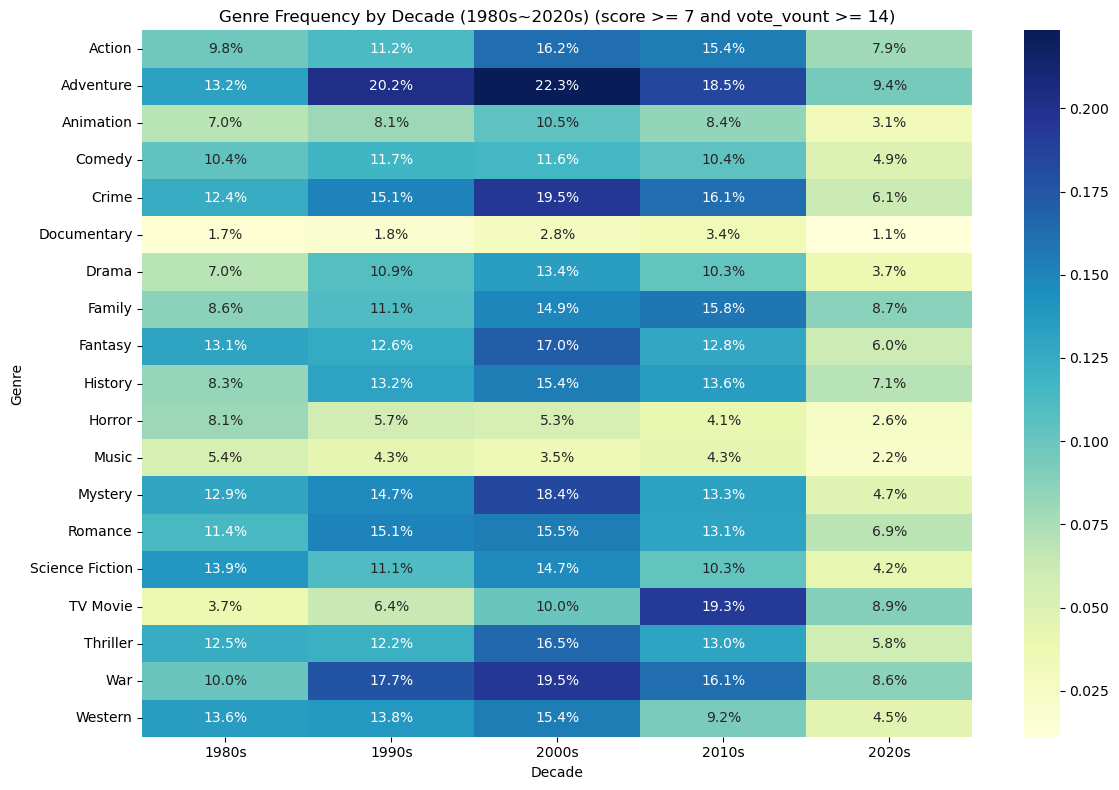

In [113]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# plt.figure(figsize=(12, 8))
# sns.heatmap(
#     genre_ratio_filtered,  # 실수 데이터
#     annot=genre_vote_ratio_percent,  # 퍼센트 표시
#     fmt="",
#     cmap="YlGnBu"
# )
# plt.title("Genre Frequency by Decade (1980s~2020s) (score >= 7 and vote_vount >= 14)")
# plt.xlabel("Decade")
# plt.ylabel("Genre")
# plt.tight_layout()
# plt.show()